# Accessing Stock Price Data 

In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
start_date = datetime.datetime(2017,8,15)
end_date = datetime.datetime(2022,8,15)

In [12]:
web.DataReader(name="PFE", data_source='yahoo', start=start_date, end=end_date).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-15,31.812143,31.555977,31.631880,31.669828,18048801.0,26.386850
2017-08-16,31.774195,31.555977,31.622391,31.650854,11128764.0,26.371046
2017-08-17,31.736242,31.261860,31.584440,31.261860,15661175.0,26.046942
2017-08-18,31.280834,30.977230,31.223909,30.996204,16326565.0,25.825602
2017-08-21,31.185959,30.664137,30.929790,31.081594,17848752.0,25.896748


# get_stock() Function to pulling several stocks

In [4]:
def get_stock(ticker):
    data = web.DataReader(f"{ticker}", 'yahoo', start=start_date, end=end_date)
    data[f'{ticker}'] = data["Close"]
    data = data[[f'{ticker}']] 
    return data

In [14]:
pfizer = get_stock("PFE")
jnj = get_stock("JNJ")
mrna = get_stock("MRNA")

### To take a list of stocks and generate a single data frame of stock prices for each stock:

In [5]:
from functools import reduce

def combine_stocks(tickers):
    data_frames = []
    for i in tickers:
        data_frames.append(get_stock(i))
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), data_frames)
    return df_merged


In [6]:
stocks = ["MRNA", "PFE", "JNJ"]
combine_stocks(stocks)

,MRNA,PFE,JNJ
Date,,,
2018-12-07,18.600000,41.669830,145.429993
2018-12-10,18.799999,42.125237,145.259995
2018-12-11,18.010000,41.755219,146.500000
2018-12-12,18.680000,41.897533,147.100006
2018-12-13,18.760000,42.286530,147.839996
2018-12-14,18.320000,41.555977,133.000000
2018-12-17,17.000000,40.901329,129.139999
2018-12-18,17.000000,40.227703,130.419998
2018-12-19,16.180000,39.819733,127.610001


## Pulling stocks for the following industries:
    1.Healthcare: Moderna (MRNA), Pfizer (PFE), Johnson & Johnson (JNJ)
    2.Tech: Google (GOOGL), Facebook (META), Apple (AAPL)
    3.Retail: Costco (COST), Walmart (WMT),  Kroger Co (KR)
    4.Finance: JPMorgan Chase & Co (JPM), Bank of America (BAC), HSBC Holding (HSBC)

In [7]:
stocks = ["XOM", "SLB", "AAPL", "META", "MBG.DE", "BMW.DE", "BA", "AIR.PA"  ]
portfolio = combine_stocks(stocks)

portfolio.to_csv('portfolio.csv', index=True)
portfolio = pd.read_csv("portfolio.csv")
portfolio

,Date,XOM,SLB,AAPL,META,MBG.DE,BMW.DE,BA,AIR.PA
0,2017-08-15,78.040001,63.439999,40.400002,171.000000,60.250000,80.000000,239.169998,72.339996
1,2017-08-16,77.470001,63.709999,40.237499,170.000000,60.520000,80.139999,237.589996,72.879997
2,2017-08-17,76.260002,63.029999,39.465000,166.910004,60.419998,79.809998,235.589996,72.190002
3,2017-08-18,76.639999,63.320000,39.375000,167.410004,60.310001,79.540001,235.770004,71.500000
4,2017-08-21,76.379997,63.000000,39.302502,167.779999,60.110001,78.970001,235.679993,70.839996
5,2017-08-22,76.739998,63.349998,39.945000,169.639999,60.830002,79.379997,239.750000,71.250000
6,2017-08-23,76.610001,63.189999,39.994999,168.710007,60.770000,79.110001,238.089996,70.809998
7,2017-08-24,76.330002,62.880001,39.817501,167.740005,61.650002,79.790001,238.740005,70.370003
8,2017-08-25,76.720001,63.880001,39.965000,166.320007,62.169998,79.290001,235.889999,70.860001
9,2017-08-28,76.470001,63.450001,40.367500,167.240005,61.900002,79.209999,237.179993,70.169998


In [8]:
portfolio[portfolio.Date.isna()]

,Date,XOM,SLB,AAPL,META,MBG.DE,BMW.DE,BA,AIR.PA


In [9]:
portfolio.Date = pd.to_datetime(portfolio['Date'])
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1293 non-null   datetime64[ns]
 1   XOM     1259 non-null   float64       
 2   SLB     1259 non-null   float64       
 3   AAPL    1259 non-null   float64       
 4   META    1259 non-null   float64       
 5   MBG.DE  1268 non-null   float64       
 6   BMW.DE  1268 non-null   float64       
 7   BA      1259 non-null   float64       
 8   AIR.PA  1282 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 91.0 KB


In [10]:
portfolio.describe()

,XOM,SLB,AAPL,META,MBG.DE,BMW.DE,BA,AIR.PA
count,1259.000000,1259.000000,1259.000000,1259.000000,1268.000000,1268.000000,1259.000000,1282.000000
mean,67.905314,40.230349,89.926783,221.225068,58.148398,75.783990,267.249547,99.823479
std,15.941674,16.910811,46.117945,63.196325,13.389360,11.639387,82.632752,19.820138
min,31.450001,12.050000,35.547501,124.059998,21.840000,37.660000,95.010002,49.064999
25%,57.060001,28.330000,47.185001,175.115005,48.675000,68.699999,202.220001,89.080000
50%,71.879997,36.660000,71.107498,194.470001,57.674999,76.400002,254.210007,100.950001
75%,80.735001,49.510000,133.300003,266.865005,69.474998,85.300003,346.830002,114.080002
max,104.589996,79.790001,182.009995,382.179993,90.970001,99.320000,440.619995,139.000000


In [11]:
portfolio.index = portfolio.Date
portfolio.drop("Date", inplace=True, axis=1)
portfolio.head()

,XOM,SLB,AAPL,META,MBG.DE,BMW.DE,BA,AIR.PA
Date,,,,,,,,
2017-08-15,78.040001,63.439999,40.400002,171.000000,60.250000,80.000000,239.169998,72.339996
2017-08-16,77.470001,63.709999,40.237499,170.000000,60.520000,80.139999,237.589996,72.879997
2017-08-17,76.260002,63.029999,39.465000,166.910004,60.419998,79.809998,235.589996,72.190002
2017-08-18,76.639999,63.320000,39.375000,167.410004,60.310001,79.540001,235.770004,71.500000
2017-08-21,76.379997,63.000000,39.302502,167.779999,60.110001,78.970001,235.679993,70.839996


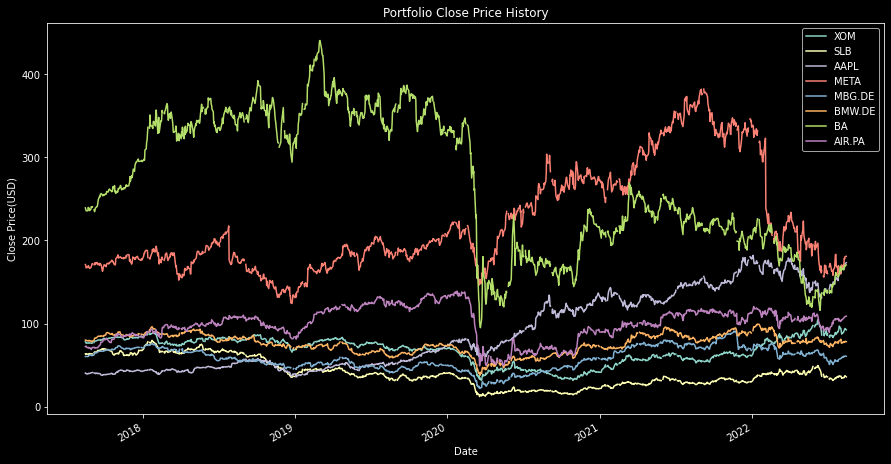

In [12]:
plt.style.use('dark_background')

ax = portfolio.plot(
        kind='line', figsize=(15, 8), title= "Portfolio Close Price History", ylabel='Close Price(USD)'
        )

## Mean Variance Optimization

###### PyPortfolioOpt is a python package that implements financial portfolio optimization techniques, including classical mean-variance optimization (MVO) methods, Black-Litterman allocation, and modern methods such as the machine learning-inspired Hierarchical Risk Parity algorithm (López de Prado, 2016).


In [9]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [13]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(portfolio)
S = CovarianceShrinkage(portfolio).ledoit_wolf()

print("mu:\n\n", mu, "\n\n")
print("S:\n\n", S)

mu:

 XOM       0.033318
SLB      -0.105789
AAPL      0.328302
META      0.011027
MBG.DE   -0.023087
BMW.DE   -0.018253
BA       -0.063912
AIR.PA    0.088392
dtype: float64 


S:

              XOM       SLB      AAPL      META    MBG.DE    BMW.DE        BA  \
XOM     0.110481  0.114120  0.032631  0.029190  0.050620  0.036210  0.079011   
SLB     0.114120  0.218667  0.042382  0.038606  0.079425  0.061449  0.107798   
AAPL    0.032631  0.042382  0.105601  0.069626  0.033973  0.023604  0.063112   
META    0.029190  0.038606  0.069626  0.156585  0.032227  0.021826  0.060651   
MBG.DE  0.050620  0.079425  0.033973  0.032227  0.237097  0.150369  0.078815   
BMW.DE  0.036210  0.061449  0.023604  0.021826  0.150369  0.160404  0.058015   
BA      0.079011  0.107798  0.063112  0.060651  0.078815  0.058015  0.237924   
AIR.PA  0.052301  0.092802  0.027794  0.027427  0.131455  0.116462  0.099378   

          AIR.PA  
XOM     0.052301  
SLB     0.092802  
AAPL    0.027794  
META    0.027427  
MBG

## import the EfficientFrontier module and calculate the weights
Here, we will use the max Sharpe statistic. The Sharpe ratio is the ratio between returns and risk. The lower the risk and the higher the returns, the higher the Sharpe ratio. The algorithm looks for the maximum Sharpe ratio, which translates to the portfolio with the highest return and lowest risk. Ultimately, the higher the Sharpe ratio, the better the performance of the portfolio.

In [14]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'XOM': 0.0, 'SLB': 0.0, 'AAPL': 1.0, 'META': 0.0, 'MBG.DE': 0.0, 'BMW.DE': 0.0, 'BA': 0.0, 'AIR.PA': 0.0}


## portfolio performance:

In [15]:
ef.portfolio_performance(verbose=True)

Expected annual return: 32.8%
Annual volatility: 32.5%
Sharpe Ratio: 0.95


(0.32830233655942953, 0.32496282295598494, 0.9487311002378508)

###  Convert the weights into actual allocations values (i.e., how many of each stock to buy). The investment amount of $100,000:

In [16]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'AAPL': 577}
Funds remaining: $69.37


# Hierarchical Risk Parity (HRP)
The HRP method works by finding subclusters of similar assets based on returns and constructing a hierarchy from these clusters to generate weights for each asset.

In [17]:
from pypfopt import HRPOpt

In [19]:
portfolio.head()

,XOM,SLB,AAPL,META,MBG.DE,BMW.DE,BA,AIR.PA
Date,,,,,,,,
2017-08-15,78.040001,63.439999,40.400002,171.000000,60.250000,80.000000,239.169998,72.339996
2017-08-16,77.470001,63.709999,40.237499,170.000000,60.520000,80.139999,237.589996,72.879997
2017-08-17,76.260002,63.029999,39.465000,166.910004,60.419998,79.809998,235.589996,72.190002
2017-08-18,76.639999,63.320000,39.375000,167.410004,60.310001,79.540001,235.770004,71.500000
2017-08-21,76.379997,63.000000,39.302502,167.779999,60.110001,78.970001,235.679993,70.839996


In [32]:
returns = portfolio.pct_change().dropna()
returns

,XOM,SLB,AAPL,META,MBG.DE,BMW.DE,BA,AIR.PA
Date,,,,,,,,
2017-08-16,-0.007304,0.004256,-0.004022,-0.005848,0.004481,0.001750,-0.006606,0.007465
2017-08-17,-0.015619,-0.010673,-0.019198,-0.018176,-0.001652,-0.004118,-0.008418,-0.009468
2017-08-18,0.004983,0.004601,-0.002281,0.002996,-0.001821,-0.003383,0.000764,-0.009558
2017-08-21,-0.003393,-0.005054,-0.001841,0.002210,-0.003316,-0.007166,-0.000382,-0.009231
2017-08-22,0.004713,0.005556,0.016348,0.011086,0.011978,0.005192,0.017269,0.005788
2017-08-23,-0.001694,-0.002526,0.001252,-0.005482,-0.000986,-0.003401,-0.006924,-0.006175
2017-08-24,-0.003655,-0.004906,-0.004438,-0.005750,0.014481,0.008596,0.002730,-0.006214
2017-08-25,0.005109,0.015903,0.003704,-0.008465,0.008435,-0.006266,-0.011938,0.006963
2017-08-28,-0.003259,-0.006731,0.010071,0.005531,-0.004343,-0.001009,0.005469,-0.009738


A HRPOpt object (returns) constructs a hierarchical risk parity portfolio.
optimize() calculates weights using HRP. resource: https://pyportfolioopt.readthedocs.io/en/latest/_modules/pypfopt/hierarchical_portfolio.html

In [33]:
hrp = HRPOpt(returns)
hrp_weights = hrp.optimize()
hrp_weights

OrderedDict([('AAPL', 0.23198487398432302),
             ('AIR.PA', 0.0541536429474847),
             ('BA', 0.09528195983663827),
             ('BMW.DE', 0.14725874956807214),
             ('MBG.DE', 0.07895940091632193),
             ('META', 0.1482795230230964),
             ('SLB', 0.07923573774278944),
             ('XOM', 0.1648461119812741)])

In [78]:
allocations_df = pd.DataFrame.from_dict(hrp_weights, orient='index').reset_index()
allocations_df.columns = ['Stocks','Returns']
allocations_df

,Stocks,Returns
0,AAPL,0.231985
1,AIR.PA,0.054154
2,BA,0.095282
3,BMW.DE,0.147259
4,MBG.DE,0.078959
5,META,0.148280
6,SLB,0.079236
7,XOM,0.164846


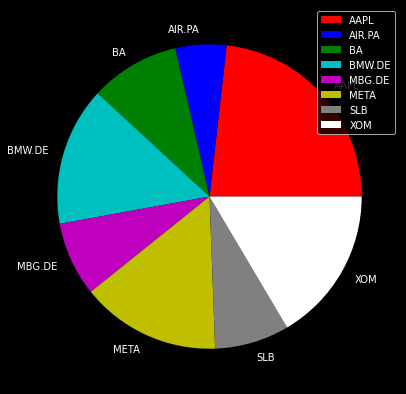

In [94]:
fig = plt.figure(figsize =(10, 7))

plt.pie(allocations_df.Returns, labels = allocations_df.Stocks,
       colors = ['r', 'b', 'g', 'c', 'm', 'y', 'grey', 'w'],
      )
plt.legend()
plt.show()

###### portfolio_performance() calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.

In [34]:
hrp.portfolio_performance(verbose=True)
print(dict(hrp_weights))

Expected annual return: 14.2%
Annual volatility: 26.4%
Sharpe Ratio: 0.46
{'AAPL': 0.23198487398432302, 'AIR.PA': 0.0541536429474847, 'BA': 0.09528195983663827, 'BMW.DE': 0.14725874956807214, 'MBG.DE': 0.07895940091632193, 'META': 0.1482795230230964, 'SLB': 0.07923573774278944, 'XOM': 0.1648461119812741}


# Mean Conditional Value at Risk (mCVAR)
The mCVAR is another popular alternative to mean variance optimization. It works by measuring the worst-case scenarios for each asset in the portfolio, which is represented here by losing the most money. The worst-case loss for each asset is then used to calculate weights to be used for allocation for each asset. 

In [95]:
from pypfopt.efficient_frontier import EfficientCVaR

In [96]:
S = portfolio.cov()
ef_cvar = EfficientCVaR(mu, S)
cvar_weights = ef_cvar.min_cvar()
cleaned_weights = ef_cvar.clean_weights()

ef_cvar.portfolio_performance(verbose=True)
print("\n Stocks-Weights are:\n", dict(cleaned_weights))

Expected annual return: 1.6%
Conditional Value at Risk: -12020.33%

 Stocks-Weights are:
 {'XOM': 0.0, 'SLB': 0.50921, 'AAPL': 0.24028, 'META': 0.0, 'MBG.DE': 0.17223, 'BMW.DE': 0.0, 'BA': 0.07829, 'AIR.PA': 0.0}


### Discrete Allocation

In [97]:
da_cvar = DiscreteAllocation(cvar_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_cvar.greedy_portfolio()
print("Discrete allocation (CVAR):", allocation)
print("Funds remaining (CVAR): ${:.2f} ".format(leftover))

Discrete allocation (CVAR): {'SLB': 1423, 'AAPL': 138, 'MBG.DE': 322, 'BA': 46, 'XOM': 1}
Funds remaining (CVAR): $68.46 
